<font size = "6"> Heart Failure </font>

<font size = "3"> In today's world, heart failure has been increasing among the elderly. Heart failure does not mean the heart stops beating. It means the heart cannot pump enough blood and oxygen to support the organs. However, it is a long-term disorder with no cure, but there are treatments that can help, such as quitting smoking and losing weight.</font>

<font size = "6"> Import Libraries </font>

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


<font size ="6"> Load Data </font>

In [2]:
heartFail = pd.read_csv("heart_failure_clinical_records_dataset.csv")
print(heartFail.shape) # will have 12 column including x and y, and 299 row or record


(299, 12)


<font  size= "6">  Attributes </font>

In [3]:
heartFail.sample(5) # showing sample of 5 records

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
24,75.0,0,582,1,30,1,263358.03,1.83,134,0,0,1
143,61.0,1,84,0,40,1,229000.00,0.90,141,0,0,0
77,42.0,0,102,1,40,0,237000.00,1.20,140,1,0,0
84,59.0,1,280,1,25,1,302000.00,1.00,141,0,0,1
55,95.0,1,371,0,30,0,461000.00,2.00,132,1,0,1


<font size = "3">
Sex - Gender of patient Male = 1, Female =0 <br>
Age - Age of patient <br>
Diabetes - 0 = No, 1 = Yes <br>
Anaemia - 0 = No, 1 = Yes <br>
High_blood_pressure - 0 = No, 1 = Yes <br>
Smoking - 0 = No, 1 = Yes <br>
DEATH_EVENT - 0 = No, 1 = Yes  <br>
</font>

<font size = "6" > is Age indicator for Death Event ? </font>

In [4]:
# age distribution
hist_data =[heartFail["age"].values]
group_labels = ['age'] 

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Age Distribution plot')

fig.show()

<font size = "3" > we can see the between it did peak between age of 46 and 76 <br> less than 46 and higher thean 80 was very low </font>

<font size = 6 > Analysis Surviving based on Gender </font>

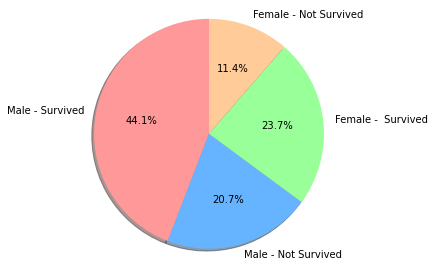

In [5]:
male = heartFail[heartFail["sex"]==1]
female = heartFail[heartFail["sex"]==0]

male_survived = male[heartFail["DEATH_EVENT"]==0]
male_notsurv = male[heartFail["DEATH_EVENT"]==1]
female_survived = female[heartFail["DEATH_EVENT"]==0]
female_notsurv = female[heartFail["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]

sizes = [len(male[heartFail["DEATH_EVENT"]==0]),len(male[heartFail["DEATH_EVENT"]==1]),
         len(female[heartFail["DEATH_EVENT"]==0]),len(female[heartFail["DEATH_EVENT"]==1])]
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots(facecolor=(1, 1, 1))
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.rcParams.update({'font.size': 15})
plt.tight_layout()
plt.show()

<font size = 3> we can see men had the higher percentage of surviving<br> might be also an indicator that the samples were mostly men </font>

<font size = 6> Analysis Surviving based on Smoking </font>

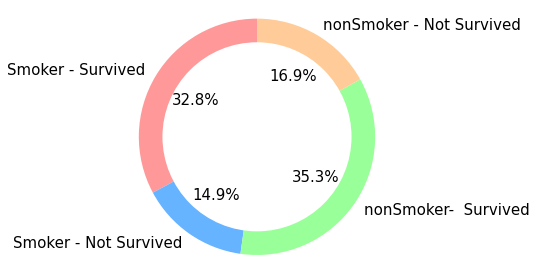

In [6]:
Smoker = heartFail[heartFail["smoking"]==1]
nonSmoker = heartFail[heartFail["sex"]==0]

Smoker_Survived = Smoker[heartFail["DEATH_EVENT"]==0]
Smoker_notSurvived = Smoker[heartFail["DEATH_EVENT"]==1]
nonSmoker_Survived = nonSmoker[heartFail["DEATH_EVENT"]==0]
nonSmoker_notSurvived = nonSmoker[heartFail["DEATH_EVENT"]==1]

labels = ['Smoker - Survived','Smoker - Not Survived', "nonSmoker-  Survived", "nonSmoker - Not Survived"]

sizes = [len(Smoker[heartFail["DEATH_EVENT"]==0]),len(Smoker[heartFail["DEATH_EVENT"]==1]),
         len(nonSmoker[heartFail["DEATH_EVENT"]==0]),len(nonSmoker[heartFail["DEATH_EVENT"]==1])]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots(facecolor=(1, 1, 1))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.rcParams.update({'font.size': 12})
plt.tight_layout()
plt.show()

<font size = 6> Ejection Fraction <br> <font size = 3 > heart pumping enough blood </font> </font>

In [7]:
# age distribution
hist_data =[heartFail["ejection_fraction"].values]
group_labels = ['ejection_fraction'] 

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Ejection Fraction Distribution plot')

fig.show()

<font size = 6> Platelets and Death Event Count </font>

In [8]:
fig = px.histogram(heartFail, x="platelets", color="DEATH_EVENT", marginal="violin", hover_data=heartFail.columns)
fig.show()

<font size = 6> Heat Map </font>

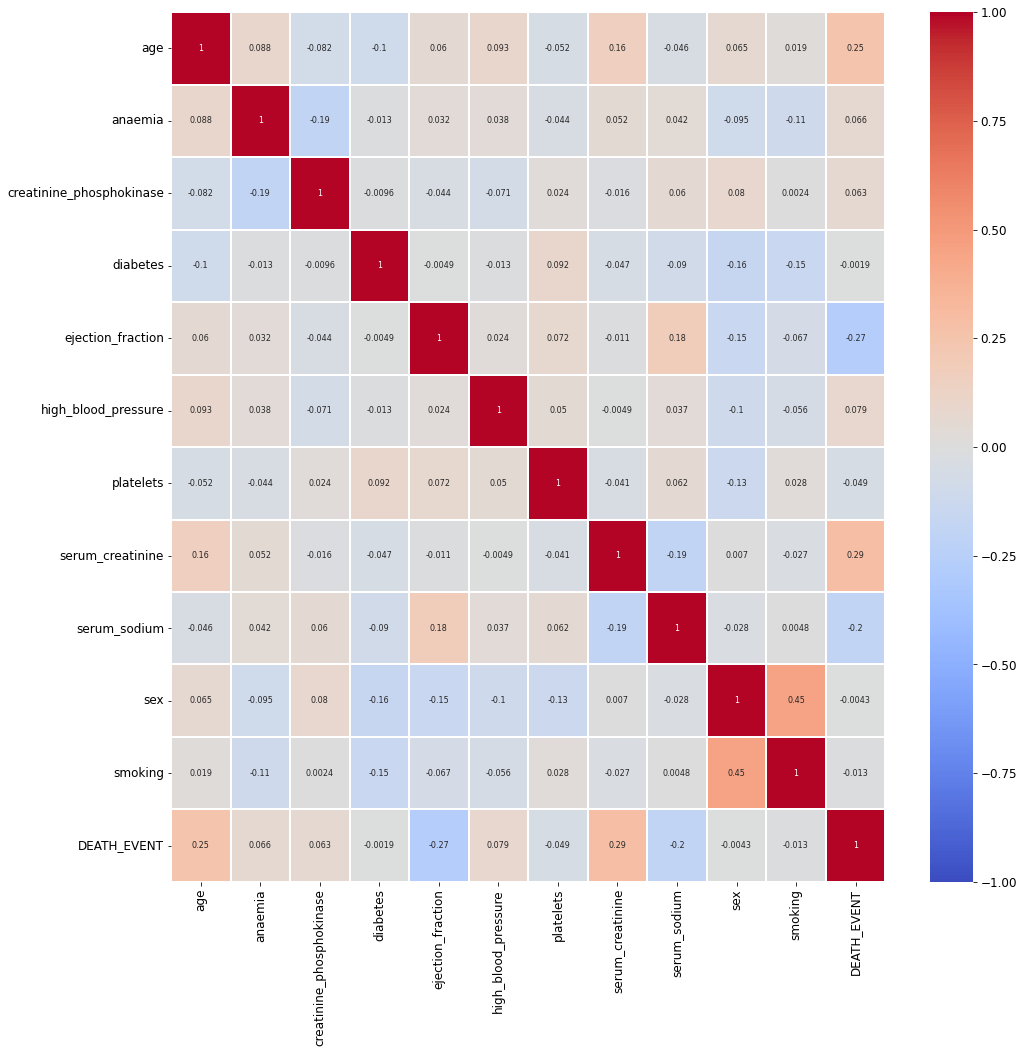

In [9]:
plt.figure(figsize=(16,16))
sns.heatmap(heartFail.corr(), vmin=-1, cmap='coolwarm', linewidths=0.1, annot=True, annot_kws={"fontsize":8});

<font size = 6> Featuers Distribution </font>

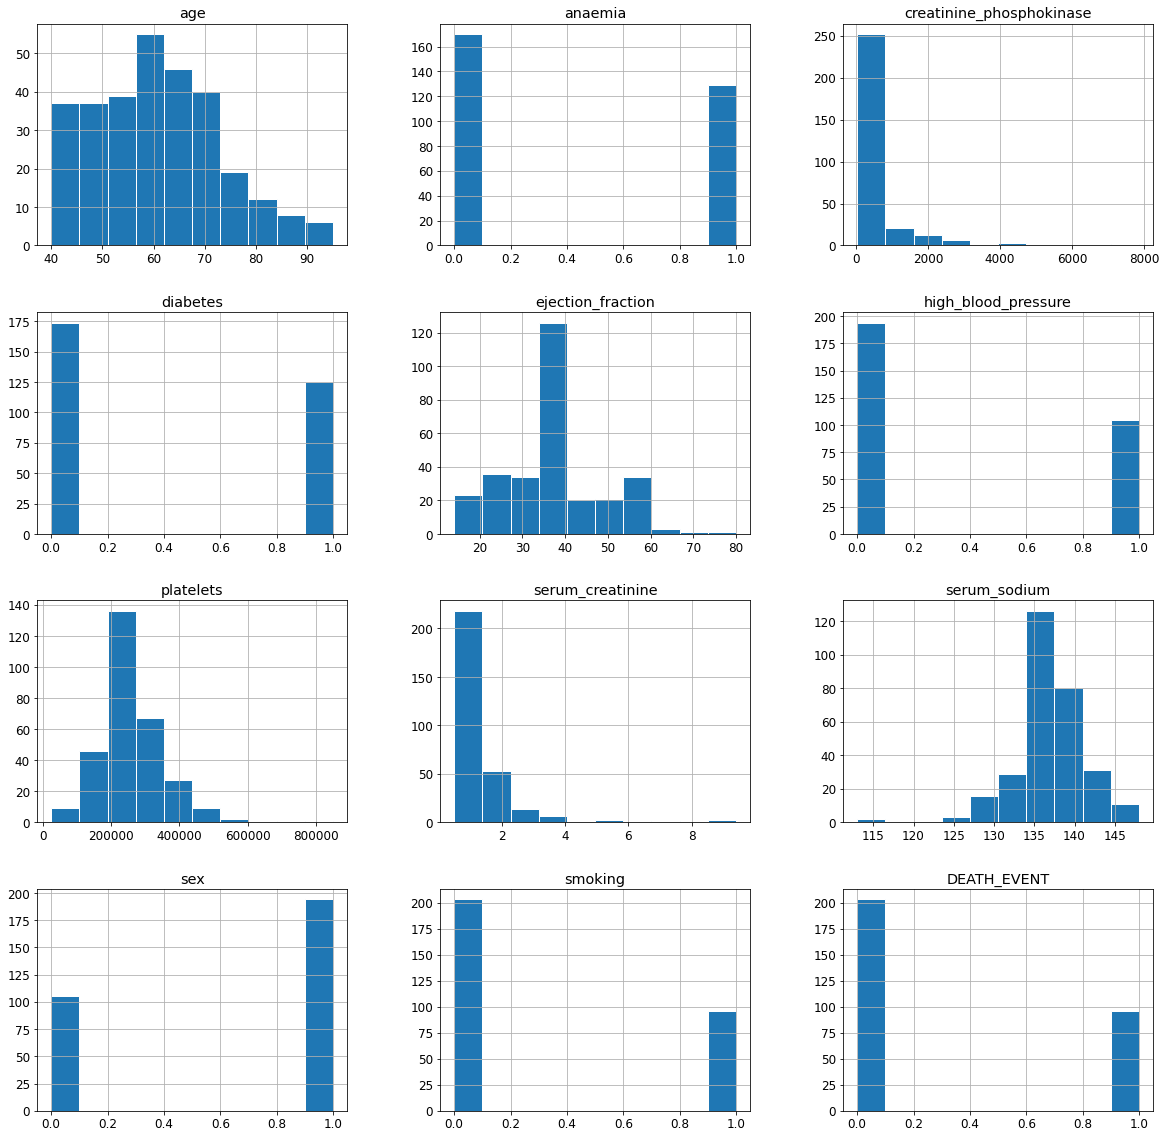

In [10]:
heartFail.hist(figsize=(20,20), edgecolor='white')
plt.show()

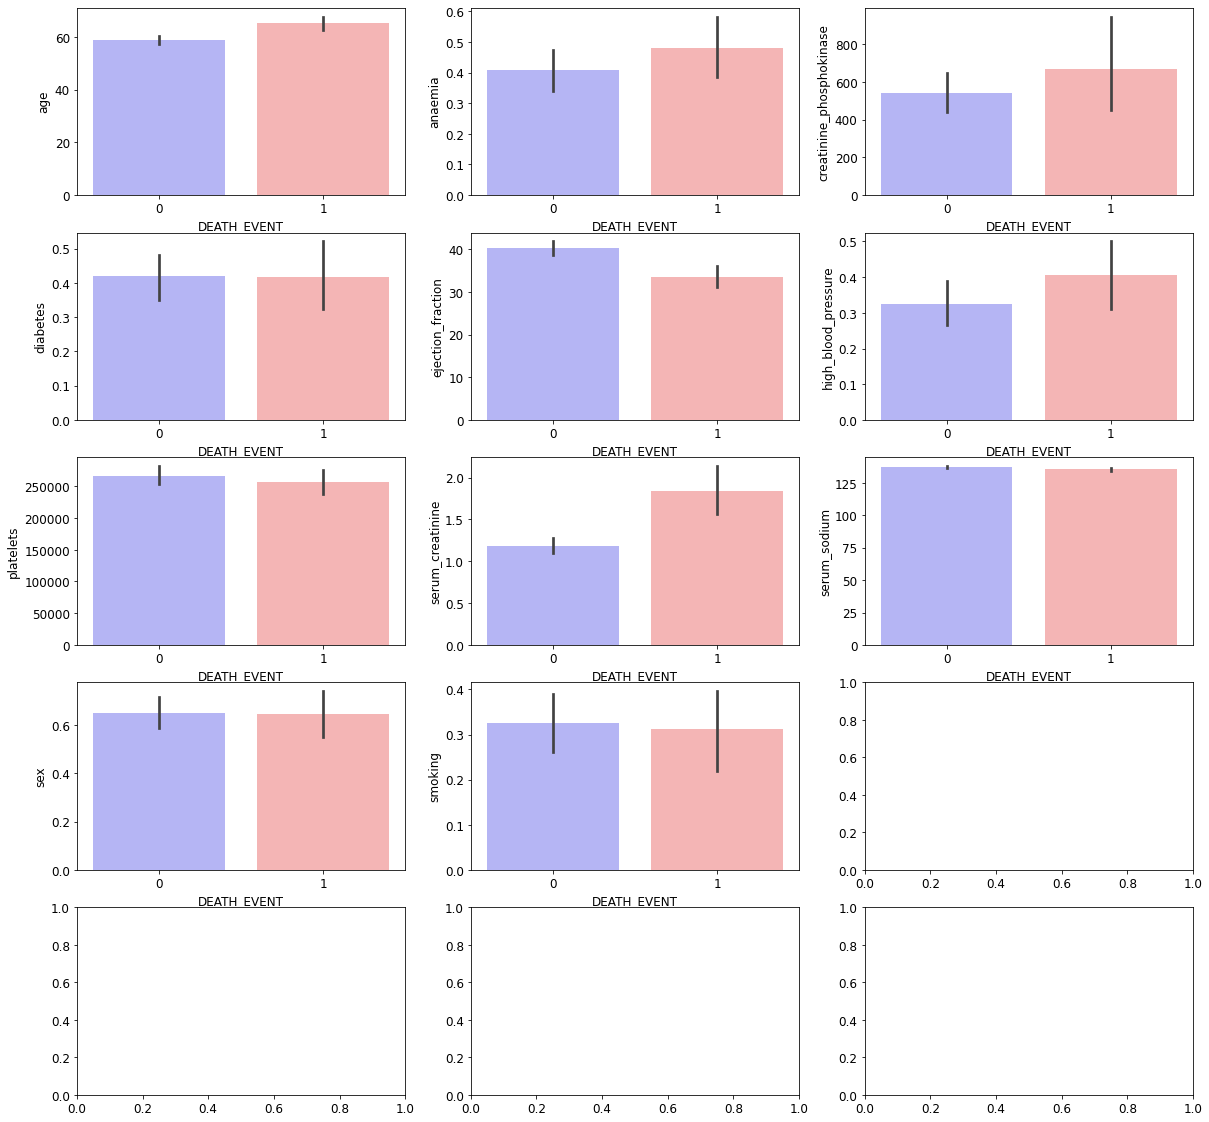

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


In [11]:
central = heartFail.groupby('DEATH_EVENT').apply(lambda x: x)
features = np.array(central.keys())
features = features[:len(features)-1]
fig, ax = plt.subplots(5,3, figsize=(20,20))
ax = ax.ravel()
position = 0
for i in features:
    sns.barplot(data=central, x='DEATH_EVENT', y=i, ax=ax[position], palette='bwr')
    position += 1
    
plt.show()
display(central)


<font size = "6"> Test Train Split  </font>

In [12]:
# Test train split - dropped the last column from x , and y will have only death event
x_train , x_test, y_train , y_test = train_test_split(heartFail.drop('DEATH_EVENT', axis = 1 ), heartFail['DEATH_EVENT'],test_size=0.25)
# The split is 75 to 25
print(x_train.shape , y_train.shape , x_test.shape, y_test.shape)

(224, 11) (224,) (75, 11) (75,)


<font size = 6> Train Using Logistic Regression </font>

In [13]:
LogReg = LogisticRegression(solver='lbfgs',max_iter=1000)
# x and y converted to array
LogReg.fit(x_train.values,y_train.values)

LogisticRegression(max_iter=1000)

<font size = 6> Test Logistic Regression </font>

In [14]:
# check the model age	anaemia	creatinine_phosphokinase	diabetes	
# ejection_fraction	high_blood_pressure	platelets	serum_creatinine	serum_sodium	sex	smoking
# reshaped the array because it is multiclass and only single sample
print('death event : ',LogReg.predict(np.array([20.0,0,412.0,0,75.0,0,26800.0,0.9,125.0,0,0]).reshape(1,-1))[0])

death event :  0


<font size = 6> Score The Model </font>

In [15]:
LogReg.score(x_test.values,y_test.values)

0.7733333333333333

In [16]:
# Understant the Score
# every time the prediction is above 0.5 then will predict death event
preditcion = (LogReg.predict(x_test.values) > 0.5 ).astype(int)
np.sum(preditcion == y_test) / len(y_test)
# as we can see we got the same number
# it was just getting the sum of our prediction if equal the acutal value
# dividing by the length
# the precentage of correctance 

0.7733333333333333

<font size = "6"> Visulaize Output </font>

In [17]:
y_pred = LogReg.predict(x_test)
logRegAcc= accuracy_score(y_pred,y_test)
accuracy_list = []
accuracy_list.append(100*logRegAcc)
print( f"Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* logRegAcc))

Accuracy of Logistic Regression is :  77.33%


number of correct predictions:  58


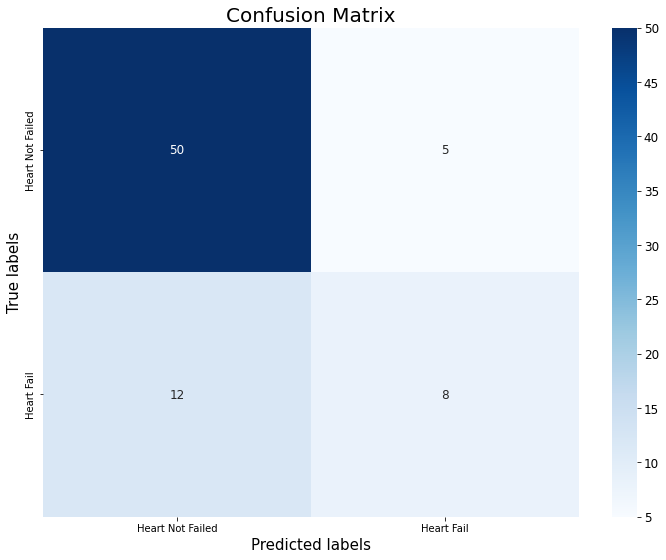

In [18]:
cm = confusion_matrix(y_test, y_pred)
print('number of correct predictions: ',np.sum(preditcion == y_test))
plt.figure(figsize=(12, 9))
fig = plt.subplot()
sns.heatmap(cm, annot=True,  ax=fig,cmap="Blues");  #annot=True to annotate cells
# labels, title and ticks
fig.set_xlabel('Predicted labels', fontsize = 15);
fig.set_ylabel('True labels',fontsize = 15); 
fig.set_title('Confusion Matrix',fontsize = 20); 
fig.xaxis.set_ticklabels(['Heart Not Failed', 'Heart Fail'],fontsize = 10);
fig.yaxis.set_ticklabels(['Heart Not Failed', 'Heart Fail'],fontsize = 10);

In [19]:
# Showing Correctance of prediction in easier way  
data = {'Y True Value': y_test, 'Y Prediction': y_test}  
# Create DataFrame  
df = pd.DataFrame(data)    
# Print the output.  
print(df)  
print('Number Of Correct Prediction out of 75 is : ',np.sum(preditcion == y_test) )

     Y True Value  Y Prediction
247             0             0
215             0             0
130             0             0
197             0             0
30              1             1
..            ...           ...
253             0             0
224             0             0
3               1             1
113             1             1
259             0             0

[75 rows x 2 columns]
Number Of Correct Prediction out of 75 is :  58


<font size = 6> K Neighbors Classifier </font>

In [20]:
kneighbor= KNeighborsClassifier(n_neighbors=6)
kneighbor.fit(x_train, y_train)
kneighbor_pred = kneighbor.predict(x_test)
kn_acc = accuracy_score(y_test, kneighbor_pred)
accuracy_list.append(100*kn_acc)
print(f"Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_acc))

Accuracy of K Neighbors Classifier is :  72.00%


number of correct predictions:  54


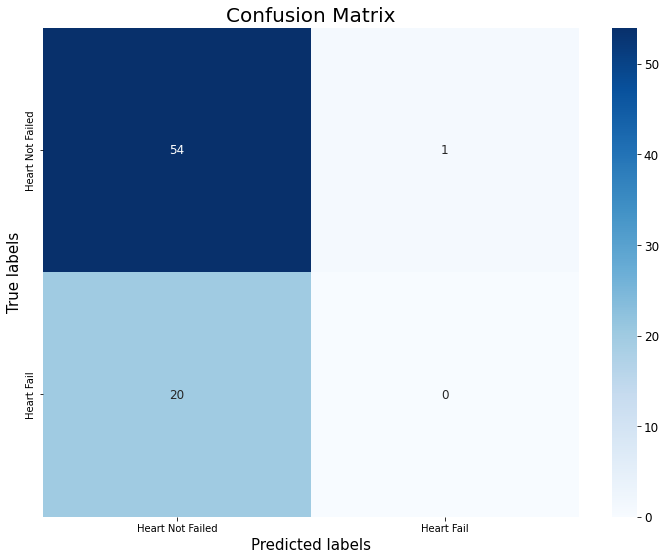

In [21]:
cm = confusion_matrix(y_test, kneighbor_pred)
print('number of correct predictions: ',np.sum(kneighbor_pred == y_test))
plt.figure(figsize=(12, 9))
fig = plt.subplot()
sns.heatmap(cm, annot=True,  ax=fig,cmap="Blues");  #annot=True to annotate cells
# labels, title and ticks
fig.set_xlabel('Predicted labels', fontsize = 15);
fig.set_ylabel('True labels',fontsize = 15); 
fig.set_title('Confusion Matrix',fontsize = 20); 
fig.xaxis.set_ticklabels(['Heart Not Failed', 'Heart Fail'],fontsize = 10);
fig.yaxis.set_ticklabels(['Heart Not Failed', 'Heart Fail'],fontsize = 10);

<font size = 6> Decision Tree Classifier </font>

In [22]:

dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)
print( "Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))

Accuracy of Decision Tree Classifier is :  74.67%


number of correct predictions:  56


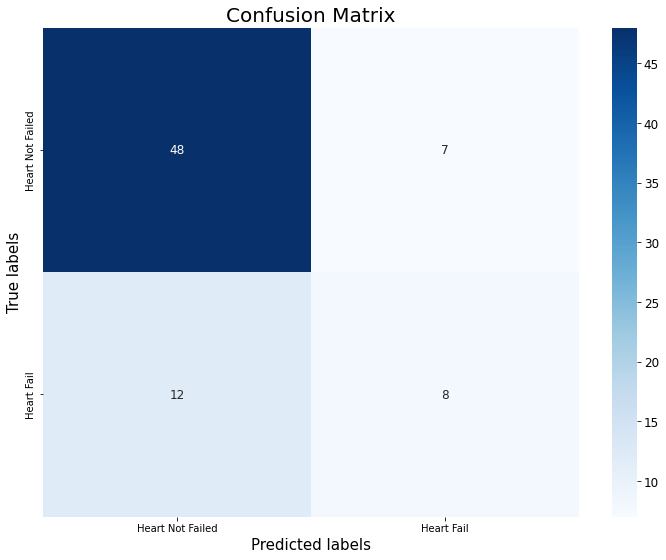

In [23]:
cm = confusion_matrix(y_test, dt_pred)
print('number of correct predictions: ',np.sum(dt_pred == y_test))
plt.figure(figsize=(12, 9))
fig = plt.subplot()
sns.heatmap(cm, annot=True,  ax=fig,cmap="Blues");  #annot=True to annotate cells
# labels, title and ticks
fig.set_xlabel('Predicted labels', fontsize = 15);
fig.set_ylabel('True labels',fontsize = 15); 
fig.set_title('Confusion Matrix',fontsize = 20); 
fig.xaxis.set_ticklabels(['Heart Not Failed', 'Heart Fail'],fontsize = 10);
fig.yaxis.set_ticklabels(['Heart Not Failed', 'Heart Fail'],fontsize = 10);

<font size = 6> Random Forest Classifier </font>

In [24]:
# RandomForestClassifier
# creating the object
r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
# fitting the data to our random forst
r_clf.fit(x_train, y_train)
# predict the data 
r_pred = r_clf.predict(x_test)
# comprare atual to prediction
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)

print(f"Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))

Accuracy of Random Forest Classifier is :  74.67%


number of correct predictions:  56


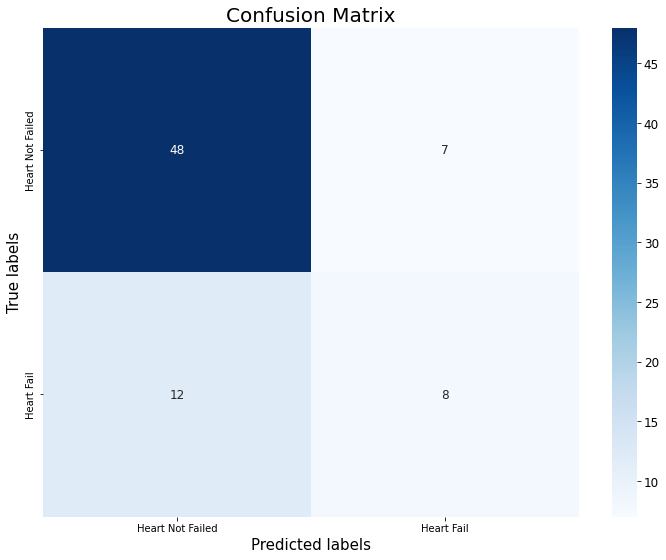

In [25]:
cm = confusion_matrix(y_test, dt_pred)
print('number of correct predictions: ',np.sum(dt_pred == y_test))
plt.figure(figsize=(12, 9))
fig = plt.subplot()
sns.heatmap(cm, annot=True,  ax=fig,cmap="Blues");  #annot=True to annotate cells
# labels, title and ticks
fig.set_xlabel('Predicted labels', fontsize = 15);
fig.set_ylabel('True labels',fontsize = 15); 
fig.set_title('Confusion Matrix',fontsize = 20); 
fig.xaxis.set_ticklabels(['Heart Not Failed', 'Heart Fail'],fontsize = 10);
fig.yaxis.set_ticklabels(['Heart Not Failed', 'Heart Fail'],fontsize = 10);

<font size = 6 > Compare Models </font>

[77.33333333333333, 72.0, 74.66666666666667, 74.66666666666667]


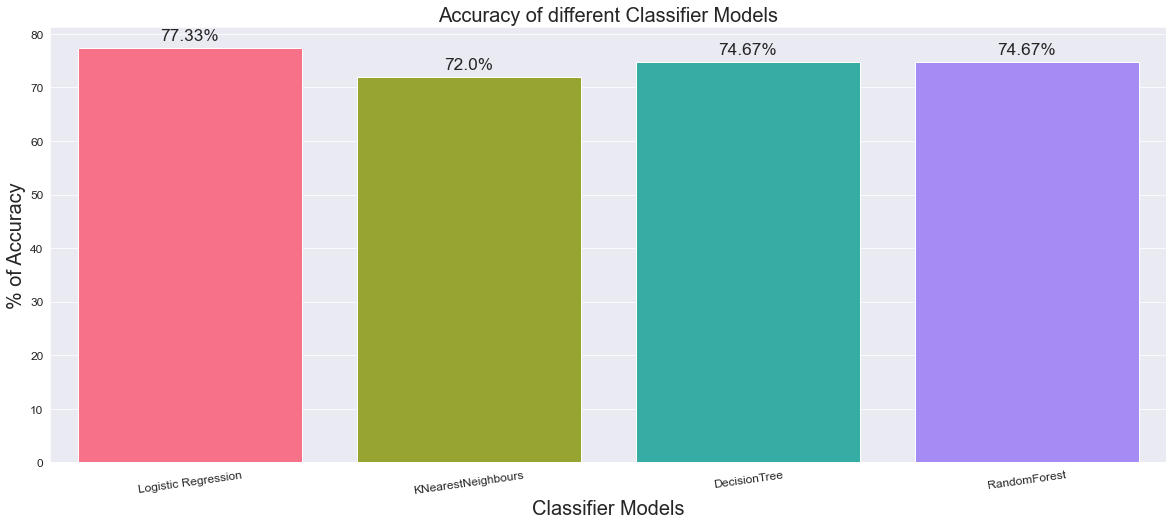

In [26]:
model_list = ['Logistic Regression', 'KNearestNeighbours', 'DecisionTree',  'RandomForest']
print(accuracy_list)
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()